<a href="https://colab.research.google.com/github/unisttt/open-implementation/blob/master/NN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df_train = pd.read_csv("sample_data/mnist_train_small.csv", header=None)
df_test = pd.read_csv("sample_data/mnist_test.csv", header=None)

In [4]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df_train.shape)
print(df_test.shape)

(20000, 785)
(10000, 785)


In [6]:
train = df_train.values
train_y = train[:, 0]
train_x = train[:, 1:]
print(train_x.shape)
print(train_y.shape)
m, _ = train.shape

test = df_test.values
test_x = test[:, 1:]
test_y = test[:, 0]
print(test_x.shape)
print(test_y.shape)

(20000, 784)
(20000,)
(10000, 784)
(10000,)


In [0]:
input_layer_size = train_x.shape[1]  # 784
hidden_layer_size = 25
num_labels = 10

In [8]:
def initializeTheta(input_layer_size, hidden_layer_size, num_labels):
  np.random.seed(1)
  Theta1 = np.random.randn(hidden_layer_size, input_layer_size + 1)
  Theta2 = np.random.randn(num_labels, hidden_layer_size + 1)
#   print(Theta1.reshape(hidden_layer_size * (input_layer_size + 1)).shape)
#   print(Theta1.ravel().shape)
#   print(Theta1.flatten().shape)
  print(Theta1.shape)
  return np.append(Theta1.flatten(), Theta2.flatten())
  
  
nn_params = initializeTheta(input_layer_size, hidden_layer_size, num_labels)
print(nn_params.shape)

(25, 785)
(19885,)


In [0]:
def sigmoid(x):
  # Prevent overflow.
  x = np.clip(x, -500, 500 )
  return 1.0 / (1.0 + np.exp(-x))

In [10]:
def one_hot(y):
  oh_y = np.zeros((m, num_labels))
  for i in range(m):
    label = y[i]
    oh_y[i, label] = 1
    
  return oh_y

oh_y = one_hot(train_y)
print(oh_y.shape)

(20000, 10)


In [0]:
def unroll(params):
  param1 = params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
  param2 = params[hidden_layer_size * (input_layer_size+ 1) :].reshape(num_labels, hidden_layer_size + 1)
  
  return param1, param2

In [12]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam):
  Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
  Theta2 = nn_params[hidden_layer_size * (input_layer_size+ 1) :].reshape(num_labels, hidden_layer_size + 1)
  
  m, _ = X.shape
  
  J = 0
  Theta1_grad = np.zeros_like(Theta1)
  Theta2_grad = np.zeros_like(Theta2)
  
  # Forward propagation
  a1 = X
  a1 = np.append(np.ones((m, 1)), a1, axis=1)  # (20000, 785) add bias term
  z2 = np.dot(a1, Theta1.T)  # (20000, 25)
  a2 = sigmoid(z2)
  a2 = np.append(np.ones((m, 1)), a2, axis=1)  # (20000, 26)
  
  z3 = np.dot(a2, Theta2.T)  # (20000, 10)
  a3 = sigmoid(z3)
  
  pred1 = -oh_y * np.log(a3)
  pred0 = -(1 - oh_y) * np.log(1 - a3)
  J = 1 / m * (pred1.sum() + pred0.sum())
  
  tmp = (Theta1[:, 1:] ** 2).sum() + (Theta2[:, 1:] ** 2).sum()
  norm = lam / 2 / m * tmp
  J += norm
  
  # Backpropagation
  Theta2_grad = np.zeros_like(Theta2)
  Theta1_grad = np.zeros_like(Theta1)
  
  d3 = a3 - oh_y
  d2 = np.dot(d3, Theta2) * (a2 * (1 - a2))
  d2 = d2[:, 1:]
  
  Theta2_grad = 1 / m * (Theta2_grad + np.dot(a2.T, d3).T)
  Theta1_grad = 1 / m * (Theta1_grad + np.dot(a1.T, d2).T)
  
  # reg

  Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + lam / m * Theta2[:, 1:]
  Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + lam / m * Theta1[:, 1:]
  
  grad = np.append(Theta1_grad.flatten(), Theta2_grad.flatten())
  
  return J, grad
  
nn_params = initializeTheta(input_layer_size, hidden_layer_size, num_labels)
# print(nn_params.shape)
J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, train_x, oh_y, lam=5) 
# print(J)
# print(grad.shape)

(25, 785)


In [13]:
Theta1_grad, Theta2_grad = unroll(grad)
print(Theta1_grad.shape)
print(Theta2_grad.shape)

(25, 785)
(10, 26)


In [0]:
def neumericalGradient(J, theta):
  numgrad = np.zeros_like(theta)
  perturb = np.zeros_like(theta)

In [0]:
def testModel(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam):
  Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
  Theta2 = nn_params[hidden_layer_size * (input_layer_size+ 1) :].reshape(num_labels, hidden_layer_size + 1)
  
  m, _ = X.shape
  
  J = 0
  Theta1_grad = np.zeros_like(Theta1)
  Theta2_grad = np.zeros_like(Theta2)
  
  # Forward propagation
  a1 = X
  a1 = np.append(np.ones((m, 1)), a1, axis=1)  # (20000, 785) add bias term
  z2 = np.dot(a1, Theta1.T)  # (20000, 25)
  a2 = sigmoid(z2)
  a2 = np.append(np.ones((m, 1)), a2, axis=1)  # (20000, 26)
  
  z3 = np.dot(a2, Theta2.T)  # (20000, 10)
  a3 = sigmoid(z3)
  print(a3[:5, :])
  predict = a3.argmax(axis=1)
  print(predict[:5])
  print(y[:5])
  correct = (predict == y).sum()
  acc = correct / len(y)
  
  return correct, acc
  
# correct, acc = testModel(nn_params, input_layer_size, hidden_layer_size, num_labels, test_x, test_y, lam=5)
# print("correct: {} accuracy: {}".format(correct, acc))

In [16]:
epoch = 2000
lr = 0.1
loss_hist = []
acc_hist = []

for t in range(epoch):
  print("epoch: {}".format(t))
  J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, train_x, oh_y, lam=2)
  loss_hist = np.append(loss_hist, J)
  # update parameters
  Theta1, Theta2 = unroll(nn_params)
  Theta1_grad, Theta2_grad = unroll(grad)
  Theta1 -= lr * Theta1_grad
  Theta2 -= lr * Theta2_grad
  nn_params = np.append(Theta1.flatten(), Theta2.flatten())
  
  # evaluate_testset
  correct, acc = testModel(nn_params, input_layer_size, hidden_layer_size, num_labels, test_x, test_y, lam=5)
  acc_hist = np.append(acc_hist, acc)

epoch: 0
[[0.00630778 0.18515926 0.82286716 0.7680973  0.00991745 0.80098164
  0.06509926 0.98048562 0.98991391 0.01121985]
 [0.00454515 0.27435384 0.92888065 0.3385785  0.00194421 0.08450888
  0.99701916 0.83320309 0.99728648 0.0014195 ]
 [0.00136432 0.21694644 0.64329455 0.57257685 0.32182274 0.41506897
  0.8238635  0.54553767 0.82057971 0.05154524]
 [0.08105694 0.01353295 0.69006823 0.12357671 0.00261874 0.07747283
  0.37026751 0.9491316  0.89718627 0.00779776]
 [0.0956573  0.20844415 0.98217831 0.5721489  0.15499511 0.92569382
  0.94882813 0.98322175 0.51267099 0.00271298]]
[8 8 6 7 7]
[7 2 1 0 4]
epoch: 1
[[0.00639102 0.15974506 0.76893943 0.71752734 0.01016984 0.77374372
  0.03755785 0.96574432 0.98440533 0.01151056]
 [0.00464968 0.23295175 0.89825987 0.27270441 0.0020064  0.07159695
  0.99391751 0.7106334  0.99536256 0.00144554]
 [0.00274299 0.10067713 0.49286859 0.1481709  0.0151949  0.10858913
  0.69109149 0.32225831 0.70154018 0.1597562 ]
 [0.08280405 0.01128518 0.61358371 0.

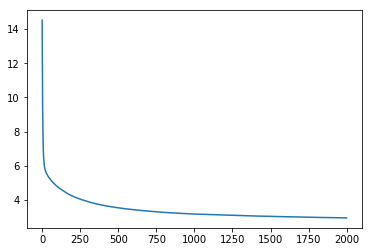

In [17]:
plt.plot(range(epoch), loss_hist)

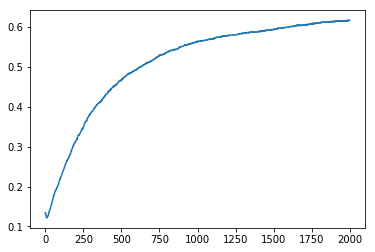

In [18]:
plt.plot(range(epoch), acc_hist)